In [5]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'postings.csv'

# Read the first 100 rows
jobDf = pd.read_csv(file_path, nrows=10000)

# Display the data
jobDf

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3886863612,The Job Network,Physical Therapist (PT) / Broomfield,Home Health Physical Therapist (PT)\n\nLocatio...,120000.0,YEARLY,"Broomfield, CO",167757.0,3.0,NaN,...,NaN,1.712658e+12,interimhealthcarestaffing-fortcollins.thejobne...,0,FULL_TIME,USD,BASE_SALARY,108500.0,80020.0,8013.0
9996,3886863627,Revature,Entry-Level Automotive Engineer,"About the RoleIn today's automotive landscape,...",NaN,NaN,"California, United States",10510386.0,3.0,NaN,...,NaN,1.712657e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
9997,3886863633,The Job Network,Automation Technician,Summary\n\nPer Se is currently seeking an Entr...,NaN,NaN,"Minneapolis, MN",167757.0,4.0,NaN,...,NaN,1.712658e+12,persegroup.thejobnetwork.com,0,FULL_TIME,NaN,NaN,NaN,55401.0,27053.0
9998,3886863634,The Job Network,Service Technician,Pay: $18.50-30 Per Hour DOE\n\nLocation: Lovel...,30.0,HOURLY,"Loveland, CO",167757.0,4.0,NaN,...,NaN,1.712658e+12,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,50440.0,80537.0,8069.0


In [7]:
import re  # For regular expressions
from langdetect import detect  # For detecting the language
from nltk.corpus import stopwords  # For stopwords
from nltk.stem import WordNetLemmatizer  # For lemmatization
import spacy  # For NLP-related tasks (tokenization)

# Download required NLTK data if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ebouk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ebouk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
def to_lowercase(text):
    return text.lower()

def keep_only_english(text):
    try:
        if detect(text) == 'en':
            return text
        else:
            return ''
    except:
        return ''  # Return empty for undetectable text

def remove_urls_emails_html(text):
    text = re.sub(r'http[s]?://\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)         # Remove email addresses
    text = re.sub(r'<.*?>', '', text)           # Remove HTML tags
    return text

def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_linebreaks_whitespace(text):
    text = re.sub(r'\r|\n', ' ', text)  # Replace line breaks with space
    text = re.sub(r'\s+', ' ', text)    # Remove extra spaces
    return text.strip()

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]


In [9]:
def clean_and_tokenize(text):
    # Apply the text preprocessing functions in sequence
    text = to_lowercase(text)
    text = keep_only_english(text)
    text = remove_urls_emails_html(text)
    text = remove_special_characters(text)
    text = remove_linebreaks_whitespace(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    tokens = tokenize_text(text)
    return tokens

# Apply the cleaning and tokenization to the description column
jobDf["cleaned_tokenized"] = jobDf["description"].apply(clean_and_tokenize)

# Preview the DataFrame
jobDf.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,cleaned_tokenized
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,"[job, descriptiona, leading, real, estate, fir..."
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,"[aspen, therapy, wellness, committed, serving,..."
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,"[national, exemplar, accepting, application, a..."
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,"[senior, associate, attorney, elder, law, trus..."
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,"[looking, hvac, service, tech, experience, com..."


In [10]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm #to monitor feature extraction progress

# Enable tqdm progress bar for pandas apply
tqdm.pandas()

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Set the model to evaluation mode
model.eval()

# Function to extract features using BERT
def extract_bert_features_from_tokens(tokens):
    # Join tokens back into a single string for BERT
    text = " ".join(tokens)
    
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")
    
    # Get the embeddings from BERT
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Extract the last hidden state (contextualized embeddings)
    # Take the mean of token embeddings to create a fixed-size vector for each text
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    
    return embeddings

# Apply the function with a progress bar
jobDf['bert_features'] = jobDf['cleaned_tokenized'].progress_apply(extract_bert_features_from_tokens)

jobDf.head()

100%|██████████| 10000/10000 [1:04:53<00:00,  2.57it/s]


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,cleaned_tokenized,bert_features
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,"[job, descriptiona, leading, real, estate, fir...","[-0.00048854575, 0.25701782, 0.42958805, -0.13..."
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,"[aspen, therapy, wellness, committed, serving,...","[-0.13660109, 0.2811888, 0.5502317, -0.2231001..."
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,"[national, exemplar, accepting, application, a...","[0.1905953, -0.0055470616, 0.35344133, 0.00270..."
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,"[senior, associate, attorney, elder, law, trus...","[-0.06970908, 0.21324405, 0.44895124, -0.03264..."
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,"[looking, hvac, service, tech, experience, com...","[0.61318666, 0.06753155, 0.24170452, -0.029253..."


In [12]:
jobDf.to_csv("cleaned_linkedin_job.csv", index=False)

In [13]:
cleaned_resume_df = pd.read_csv('cleaned_resume.csv')
cleaned_resume_df.head()

,ID,Resume_str,Resume_html,Category,cleaned_text,tokenized_text,bert_features
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administratormarketing associate hr adminis...,"['hr', 'administratormarketing', 'associate', ...",[-1.85356632e-01 3.84024203e-01 5.49783826e-...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versati...,"['hr', 'specialist', 'us', 'hr', 'operations',...",[ 6.14497736e-02 3.67423445e-01 7.23622918e-...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary 20 years experience recrui...,"['hr', 'director', 'summary', '20', 'years', '...",[-2.95886159e-01 3.83597672e-01 5.21271467e-...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...,"['hr', 'specialist', 'summary', 'dedicated', '...",[-1.75516754e-01 3.34322393e-01 5.13800919e-...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depar...,"['hr', 'manager', 'skill', 'highlights', 'hr',...",[-1.74679413e-01 4.83687460e-01 7.26341128e-...
...,...,...,...,...,...,...,...
2477,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank sgte5 non commissioned officer charge bri...,"['rank', 'sgte5', 'non', 'commissioned', 'offi...",[-1.73800543e-01 3.13712358e-01 5.58217883e-...
2478,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,government relations communications organizati...,"['government', 'relations', 'communications', ...",[-2.88374007e-01 2.25194365e-01 5.07435143e-...
2479,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent professional profile support ...,"['geek', 'squad', 'agent', 'professional', 'pr...",[ 5.40085137e-02 4.16022658e-01 3.22908878e-...
2480,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director office manager summary highly...,"['program', 'director', 'office', 'manager', '...",[-1.44375131e-01 3.12649548e-01 6.51072502e-...


In [14]:
jobDf_link = pd.read_csv('cleaned_linkedin_job.csv')
jobDf_link.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,cleaned_tokenized,bert_features
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,"['job', 'descriptiona', 'leading', 'real', 'es...",[-4.88545746e-04 2.57017821e-01 4.29588050e-...
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,"['aspen', 'therapy', 'wellness', 'committed', ...",[-1.36601090e-01 2.81188786e-01 5.50231695e-...
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,"['national', 'exemplar', 'accepting', 'applica...",[ 1.90595299e-01 -5.54706156e-03 3.53441328e-...
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,"['senior', 'associate', 'attorney', 'elder', '...",[-6.97090775e-02 2.13244051e-01 4.48951244e-...
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,"['looking', 'hvac', 'service', 'tech', 'experi...",[ 6.13186657e-01 6.75315484e-02 2.41704524e-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3886863612,The Job Network,Physical Therapist (PT) / Broomfield,Home Health Physical Therapist (PT)\n\nLocatio...,120000.0,YEARLY,"Broomfield, CO",167757.0,3.0,NaN,...,interimhealthcarestaffing-fortcollins.thejobne...,0,FULL_TIME,USD,BASE_SALARY,108500.0,80020.0,8013.0,"['home', 'health', 'physical', 'therapist', 'p...",[ 3.88478860e-02 1.81590810e-01 5.68082094e-...
9996,3886863627,Revature,Entry-Level Automotive Engineer,"About the RoleIn today's automotive landscape,...",NaN,NaN,"California, United States",10510386.0,3.0,NaN,...,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN,"['rolein', 'today', 'automotive', 'landscape',...",[ 1.82144158e-02 3.38042676e-01 4.30473357e-...
9997,3886863633,The Job Network,Automation Technician,Summary\n\nPer Se is currently seeking an Entr...,NaN,NaN,"Minneapolis, MN",167757.0,4.0,NaN,...,persegroup.thejobnetwork.com,0,FULL_TIME,NaN,NaN,NaN,55401.0,27053.0,"['summary', 'per', 'se', 'currently', 'seeking...",[ 1.66350543e-01 1.93219706e-01 3.75565261e-...
9998,3886863634,The Job Network,Service Technician,Pay: $18.50-30 Per Hour DOE\n\nLocation: Lovel...,30.0,HOURLY,"Loveland, CO",167757.0,4.0,NaN,...,expresspros.thejobnetwork.com,0,FULL_TIME,USD,BASE_SALARY,50440.0,80537.0,8069.0,"['pay', '185030', 'per', 'hour', 'doe', 'locat...",[ 1.62380531e-01 2.07520068e-01 4.76984829e-...


In [18]:
import ast

# Function to fix the format of 'bert_features' strings
def fix_list_format(bert_string):
    # Add a comma between floats using regex
    fixed_string = re.sub(r"(?<=\d)\s+(?=-?\d)", ", ", bert_string)
    return fixed_string

# Process the 'bert_features' column in both datasets
for df in [cleaned_resume_df, jobDf_link]:
    # Fix formatting
    df['bert_features'] = df['bert_features'].apply(fix_list_format)
    # Convert to Python lists
    df['bert_features'] = df['bert_features'].apply(lambda x: ast.literal_eval(x))

In [30]:
import pandas as pd
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Function to get top 5 matches for a given job
def find_top_matches(job_index, jobDf, resumeDf, top_n=5):
    # Get the BERT feature vector of the selected job
    job_vector = jobDf.iloc[job_index]['bert_features']
    
    # Calculate cosine similarity with all resumes
    similarities = []
    for _, row in resumeDf.iterrows():
        resume_vector = row['bert_features']
        similarity = cosine_similarity([job_vector], [resume_vector])[0][0]
        similarities.append(similarity)
    
    # Add similarity scores to the resumes DataFrame
    resumeDf['similarity'] = similarities
    
    # Sort by similarity score in descending order and pick top N matches
    top_matches = resumeDf.sort_values(by='similarity', ascending=False).head(top_n)
    
    return top_matches

# Choose a job to match (e.g., job at index 0)
job_index = 0
top_matches = find_top_matches(job_index, jobDf_link, cleaned_resume_df)

# Visualization
def visualize_results_cos(job_description, top_resumes):
    # Display the job description
    print("Selected Job Description:")
    print(job_description)
    print("\nTop 5 Matching Resumes:")
    
    # Display the top 5 resumes
    for idx, row in top_resumes.iterrows():
        print(f"\nResume {idx + 1} (Similarity: {row['similarity']:.2f}):")
        print(row['Resume_str'])

# Get the selected job description and visualize
selected_job_description = jobDf_link.iloc[job_index]['description']
visualize_results_cos(selected_job_description, top_matches)


Selected Job Description:
Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinary culture of cooperation and inclusion.Who you are:You must be a well-organized, creative, proactive, positive, and most importantly, kind-hearted person. Please, be responsible, respectful, and cool-under-pressure. Please, be proficient in Adobe Creative Cloud (Indesign, Illustrator, Photoshop) and Microsoft Office Suite. Above all, have fantastic taste and be a good-hearted, fun-loving person who loves working with people and is eager to learn.Role:Our office is a fast-paced environment. You’ll work directly with a Marketing team and 

In [23]:
# Function to get top 5 matches using Euclidean distance
def find_top_matches_euclidean(job_index, jobDf, resumeDf, top_n=5):
    # Get the BERT feature vector of the selected job
    job_vector = jobDf.iloc[job_index]['bert_features']
    
    # Calculate Euclidean distance with all resumes
    distances = []
    for _, row in resumeDf.iterrows():
        resume_vector = row['bert_features']
        distance = np.linalg.norm(np.array(job_vector) - np.array(resume_vector))
        distances.append(distance)
    
    # Add distance scores to the resumes DataFrame
    resumeDf['distance'] = distances
    
    # Sort by distance in ascending order (smaller distance = closer match) and pick top N matches
    top_matches = resumeDf.sort_values(by='distance', ascending=True).head(top_n)
    
    return top_matches

# Choose a job to match (e.g., job at index 0)
job_index = 0
top_matches = find_top_matches_euclidean(job_index, jobDf_link, cleaned_resume_df)

# Visualization
def visualize_results_euc(job_description, top_resumes):
    # Display the job description
    print("Selected Job Description:")
    print(job_description)
    print("\nTop 5 Matching Resumes:")
    
    # Display the top 5 resumes
    for idx, row in top_resumes.iterrows():
        print(f"\nResume {idx + 1} (Euclidean Distance: {row['distance']:.2f}):")
        print(row['Resume_str'])

# Get the selected job description and visualize
selected_job_description = jobDf_link.iloc[job_index]['description']
visualize_results_euc(selected_job_description, top_matches)

Selected Job Description:
Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinary culture of cooperation and inclusion.Who you are:You must be a well-organized, creative, proactive, positive, and most importantly, kind-hearted person. Please, be responsible, respectful, and cool-under-pressure. Please, be proficient in Adobe Creative Cloud (Indesign, Illustrator, Photoshop) and Microsoft Office Suite. Above all, have fantastic taste and be a good-hearted, fun-loving person who loves working with people and is eager to learn.Role:Our office is a fast-paced environment. You’ll work directly with a Marketing team and 

In [24]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt



# Function to get top 5 matches using Manhattan distance (L1 norm)
def find_top_matches_manhattan(job_index, jobDf, resumeDf, top_n=5):
    # Get the BERT feature vector of the selected job
    job_vector = jobDf.iloc[job_index]['bert_features']
    
    # Calculate Manhattan distance with all resumes
    distances = []
    for _, row in resumeDf.iterrows():
        resume_vector = row['bert_features']
        distance = np.sum(np.abs(np.array(job_vector) - np.array(resume_vector)))  # L1 norm
        distances.append(distance)
    
    # Add distance scores to the resumes DataFrame
    resumeDf['distance'] = distances
    
    # Sort by distance in ascending order (smaller distance = closer match) and pick top N matches
    top_matches = resumeDf.sort_values(by='distance', ascending=True).head(top_n)
    
    return top_matches

# Choose a job to match (e.g., job at index 0)
job_index = 0
top_matches = find_top_matches_manhattan(job_index, jobDf_link, cleaned_resume_df)

# Visualization
def visualize_results(job_description, top_resumes):
    # Display the job description
    print("Selected Job Description:")
    print(job_description)
    print("\nTop 5 Matching Resumes:")
    
    # Display the top 5 resumes
    for idx, row in top_resumes.iterrows():
        print(f"\nResume {idx + 1} (Manhattan Distance: {row['distance']:.2f}):")
        print(row['Resume_str'])

# Get the selected job description and visualize
selected_job_description = jobDf_link.iloc[job_index]['description']
visualize_results_euc(selected_job_description, top_matches)


Selected Job Description:
Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinary culture of cooperation and inclusion.Who you are:You must be a well-organized, creative, proactive, positive, and most importantly, kind-hearted person. Please, be responsible, respectful, and cool-under-pressure. Please, be proficient in Adobe Creative Cloud (Indesign, Illustrator, Photoshop) and Microsoft Office Suite. Above all, have fantastic taste and be a good-hearted, fun-loving person who loves working with people and is eager to learn.Role:Our office is a fast-paced environment. You’ll work directly with a Marketing team and 

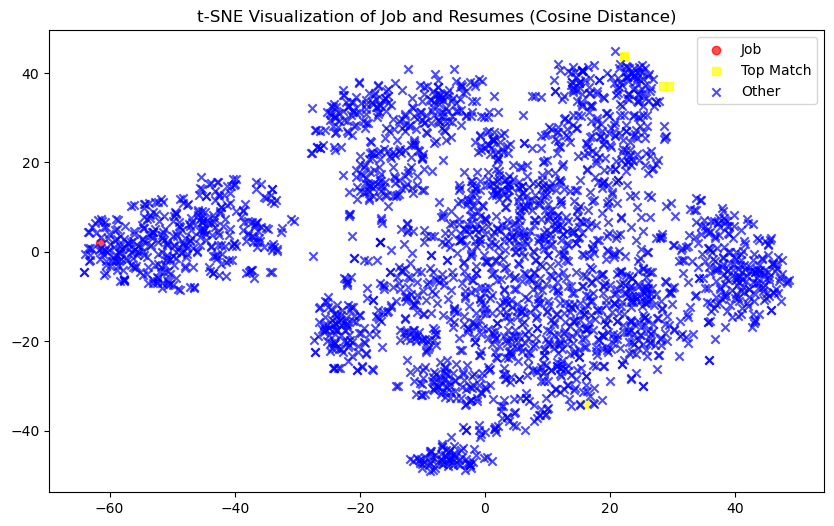

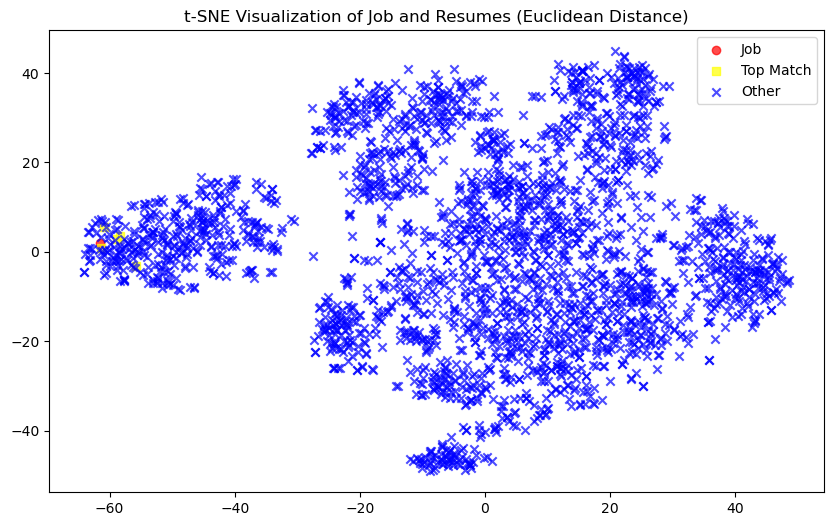

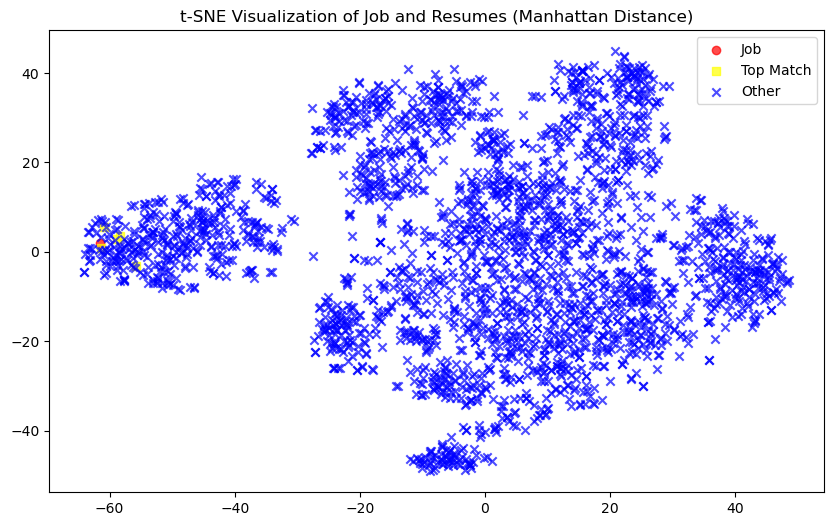

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate distances and get the top 5 matches
def calculate_distances(job_index, jobDf, resumeDf, metric):
    job_vector = jobDf.iloc[job_index]['bert_features']
    distances = []
    
    for _, row in resumeDf.iterrows():
        resume_vector = row['bert_features']
        if metric == 'cosine':
            similarity = cosine_similarity([job_vector], [resume_vector])[0][0]
            distance = 1 - similarity  # Convert similarity to a distance
        elif metric == 'euclidean':
            distance = np.linalg.norm(np.array(job_vector) - np.array(resume_vector))
        elif metric == 'manhattan':
            distance = np.sum(np.abs(np.array(job_vector) - np.array(resume_vector)))
        distances.append(distance)
    
    resumeDf['distance'] = distances
    top_matches = resumeDf.sort_values(by='distance', ascending=(metric != 'cosine')).head(5)  # Ascending for distance
    return resumeDf, top_matches

# Function to visualize using t-SNE
def visualize_with_tsne(job_index, jobDf, resumeDf, top_matches, metric):
    # Combine job and resume embeddings
    job_vector = jobDf.iloc[job_index]['bert_features']
    embeddings = [job_vector] + list(resumeDf['bert_features'])
    labels = ['Job'] + ['Top Match' if i in top_matches.index else 'Other' for i in resumeDf.index]
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    reduced_embeddings = tsne.fit_transform(np.array(embeddings))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for label, color, marker in zip(['Job', 'Top Match', 'Other'], ['red', 'yellow', 'blue'], ['o', 's', 'x']):
        idx = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], 
                    c=color, label=label, alpha=0.7, marker=marker)
    
    plt.title(f't-SNE Visualization of Job and Resumes ({metric.title()} Distance)')
    plt.legend()
    plt.show()

# Select a job and calculate distances
job_index = 100
metrics = ['cosine', 'euclidean', 'manhattan']

for metric in metrics:
    resumeDf_with_distances, top_matches = calculate_distances(job_index, jobDf_link, cleaned_resume_df, metric)
    visualize_with_tsne(job_index, jobDf_link, resumeDf_with_distances, top_matches, metric)